In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your results
import pandas as pd

# Read all CSVs
df_fractal = pd.read_csv("ablation_results_fractal_only.csv")
df_1 = pd.read_csv("/gpfs/data/oermannlab/users/schula12/TumorMorph/ablation_results_1.csv")
df_corrected = pd.read_csv("/gpfs/data/oermannlab/users/schula12/TumorMorph/ablation_results_corrected.csv") 

# Concatenate them into one giant DataFrame
df_all = pd.concat([df_fractal, df_1, df_corrected], ignore_index=True)

# Optionally, save to a new CSV
df_all.to_csv("ablation_results_all_combined.csv", index=False)



In [3]:
df_all.sort_values("Test_F1", ascending=False).head(20)

,Setup,Model,CV_Val_F1,CV_Val_F1_std,CV_Train_F1,CV_Overfit_Gap,Train_F1_Full,Train_ROC_AUC,Train_Accuracy,Test_F1,Test_ROC_AUC,Test_Accuracy,Generalization_Gap,Total_Overfit
164,All Temporal,LightGBM,0.669731,0.076190,0.860480,0.190749,0.897938,0.961999,0.906593,0.770563,0.792308,0.849057,-0.100832,0.089918
14,Fractal_Powerhouse,LightGBM,0.623913,0.041217,0.819607,0.195693,0.845254,0.914070,0.862637,0.767544,0.801923,0.811321,-0.143630,0.052063
53,Comprehensive_Winners,XGBoost,0.621115,0.057280,0.988000,0.366885,0.982228,0.997896,0.983516,0.749247,0.861538,0.792453,-0.128133,0.238753
149,Vol ∆ + Top Morph + Clinical,LightGBM,0.654590,0.053312,0.945582,0.290991,0.958261,0.992636,0.961538,0.738916,0.796154,0.792453,-0.084326,0.206665
13,Fractal_Powerhouse,XGBoost,0.655910,0.037209,0.911650,0.255740,0.881393,0.971926,0.895604,0.721053,0.778846,0.773585,-0.065143,0.190598
163,All Temporal,XGBoost,0.689358,0.048510,0.963767,0.274409,0.952137,0.992505,0.956044,0.712099,0.788462,0.792453,-0.022740,0.251669
44,Multi_Tier_Balanced,LightGBM,0.641505,0.044735,0.954760,0.313255,0.963851,0.995135,0.967033,0.703656,0.719231,0.754717,-0.062151,0.251104
18,Label_2_Dominance,XGBoost,0.607098,0.026950,0.992389,0.385291,0.982112,0.999474,0.983516,0.696895,0.815385,0.735849,-0.089797,0.295494
10,Fractal_Powerhouse,RandomForest,0.640012,0.041384,0.957972,0.317959,0.970186,0.997239,0.972527,0.696895,0.786538,0.735849,-0.056883,0.261076
84,Lesion Morph only,LightGBM,0.495939,0.071691,0.693491,0.197551,0.723712,0.808941,0.752747,0.694231,0.726923,0.773585,-0.198291,-0.000740


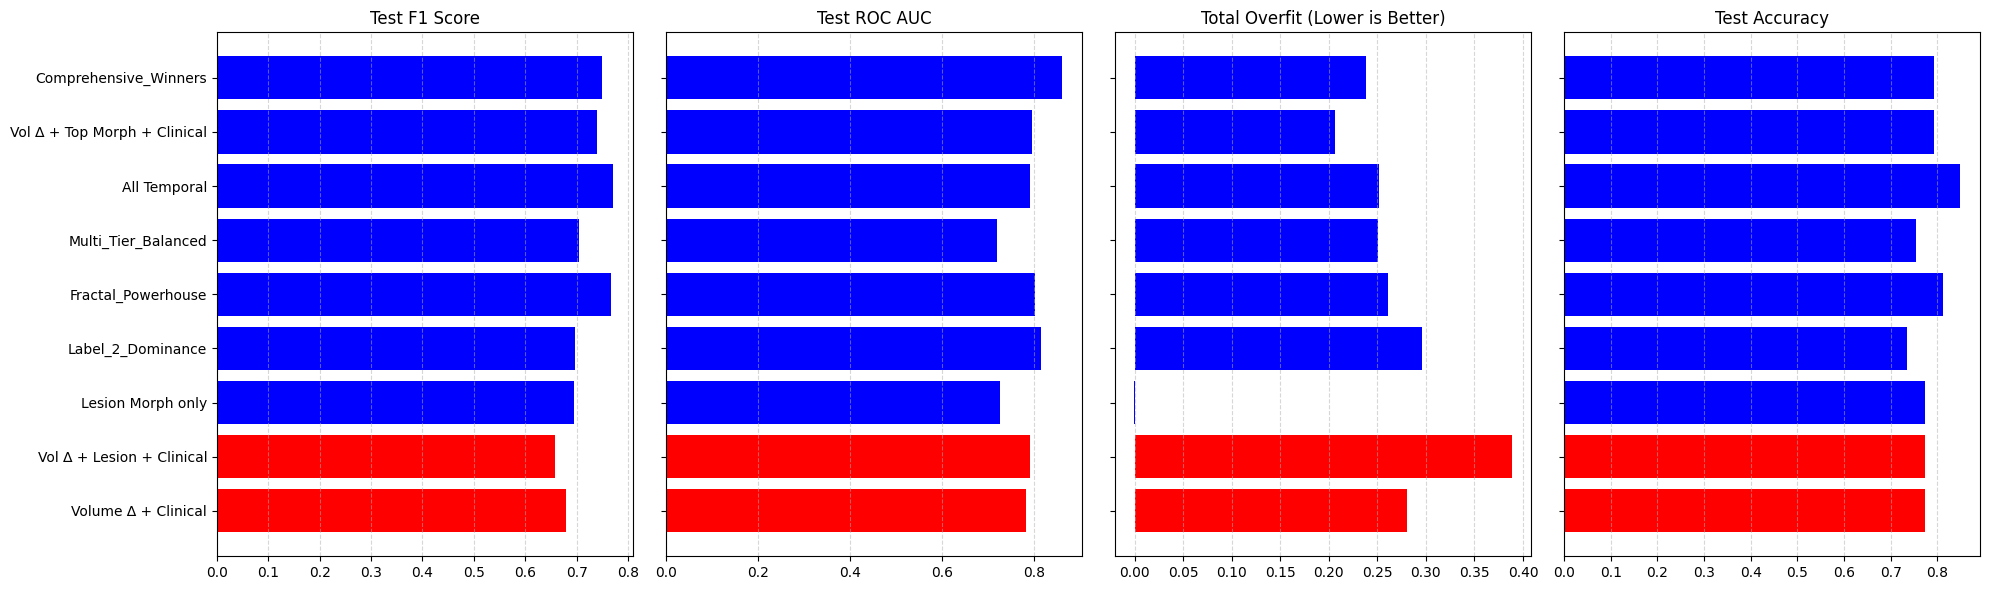

In [4]:
# 📦 Import packages
import pandas as pd
import matplotlib.pyplot as plt


# ✅ Define the baseline models you always want to compare to
baseline_setups = [
    "Volume ∆ + Clinical",
    "Vol ∆ + Lesion + Clinical"
]

combined_df = df_all 
# 🎯 Sort by best models: prioritize F1, then ROC_AUC, then minimal overfit
N = 10
top_models = combined_df.sort_values(
    by=["Test_F1", "Test_ROC_AUC", "Total_Overfit"],
    ascending=[False, False, True]
).head(N)

# 🎯 Always include baselines for comparison
baseline_models = combined_df[combined_df["Setup"].isin(baseline_setups)]
comparison_df = pd.concat([top_models, baseline_models]).drop_duplicates().reset_index(drop=True)

# 📊 Plot: Multi-metric comparison of top models vs baselines
metrics = ["Test_F1", "Test_ROC_AUC", "Total_Overfit", "Test_Accuracy"]
titles = {
    "Test_F1": "Test F1 Score",
    "Test_ROC_AUC": "Test ROC AUC",
    "Total_Overfit": "Total Overfit (Lower is Better)",
    "Test_Accuracy": "Test Accuracy"
}

# Consistent order for all plots
comparison_df_sorted = comparison_df.sort_values("Test_F1", ascending=True)
setups = comparison_df_sorted["Setup"]
colors = ['red' if setup in baseline_setups else 'blue' for setup in setups]

# Create side-by-side horizontal bar plots
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=True)
for i, metric in enumerate(metrics):
    axes[i].barh(
        setups,
        comparison_df_sorted[metric],
        color=colors
    )
    axes[i].set_title(titles[metric])
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [5]:
morph_df = pd.read_csv("/gpfs/data/oermannlab/users/schula12/TumorMorph/all_morphology_features_region.csv")
# Map the 'response' column to its string meaning using RANO_dic and insert as new column next to 'response'
RANO_dic = {0: 'complete response', 
            1: 'partial response', 
            2: 'stable disease',
            3: 'progressive disease'
           }


# Insert the mapped column right after 'response'
if 'response' in morph_df.columns:
    mapped_responses = morph_df['response'].map(RANO_dic)
    insert_at = morph_df.columns.get_loc('response') + 1
    morph_df.insert(insert_at, 'response_label', mapped_responses)
else:
    print("Warning: 'response' column not found in morph_df.")



display(morph_df)


,patient_id,case_id,response,response_label,baseline_week,followup_week,time_difference_weeks,time_difference_days,baseline_gt_original_path,baseline_swin_path,...,lacunarity_label_2_volatility_region,whole_tumor_volume_change_region,whole_tumor_volume_volatility_region,edema_volume_change_region,edema_volume_volatility_region,necrotic_volume_change_region,necrotic_volume_volatility_region,enhancing_volume_change_region,enhancing_volume_volatility_region,binary_response
0,Patient-001,case_01,2,stable disease,0,44,44,308,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.014145,-35100,-797.727273,-29965,-681.022727,159,3.613636,-5294,-120.318182,0
1,Patient-002,case_01,2,stable disease,3,21,18,126,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.018839,-65631,-3646.166667,-28380,-1576.666667,-26174,-1454.111111,-11077,-615.388889,0
2,Patient-002,case_02,3,progressive disease,3,37,34,238,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.009698,-2300,-67.647059,13220,388.823529,-10558,-310.529412,-4962,-145.941176,1
3,Patient-002,case_03,3,progressive disease,40,47,7,49,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.002004,40494,5784.857143,261,37.285714,7851,1121.571429,32382,4626.000000,1
4,Patient-003,case_01,2,stable disease,0,14,14,98,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.032045,-72346,-5167.571429,-39539,-2824.214286,-15652,-1118.000000,-17155,-1225.357143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Patient-085,case_03,3,progressive disease,1,50,49,343,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.002205,57014,1163.551020,13395,273.367347,32372,660.653061,11247,229.530612,1
231,Patient-087,case_01,3,progressive disease,0,24,24,168,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.000548,-26208,-1092.000000,-19006,-791.916667,-5366,-223.583333,-1836,-76.500000,1
232,Patient-090,case_01,3,progressive disease,0,29,29,203,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.000855,72,2.482759,3611,124.517241,-1653,-57.000000,-1886,-65.034483,1
233,Patient-091,case_01,3,progressive disease,1,26,25,175,/gpfs/data/oermannlab/users/schula12/Morpholog...,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.014582,-62945,-2517.800000,-48259,-1930.360000,-14364,-574.560000,-322,-12.880000,1


In [24]:
# Segmentation Label Diagnostic Script
# ===================================

import nibabel as nib
import numpy as np
import pandas as pd

def diagnose_segmentation_labels(seg_path, patient_info=None):
    """Diagnose the labeling scheme used in a segmentation file"""
    
    print(f"\n🔍 SEGMENTATION LABEL ANALYSIS")
    print("=" * 50)
    
    if patient_info:
        print(f"Patient: {patient_info.get('patient_id', 'Unknown')}")
        print(f"Case: {patient_info.get('case_id', 'Unknown')}")
    
    print(f"File: {seg_path}")
    
    # Load segmentation
    try:
        nii = nib.load(seg_path)
        seg_data = nii.get_fdata()
        print(f"✅ Successfully loaded segmentation")
        print(f"   Shape: {seg_data.shape}")
        print(f"   Data type: {seg_data.dtype}")
    except Exception as e:
        print(f"❌ Error loading segmentation: {e}")
        return None
    
    # Find unique labels
    unique_labels = np.unique(seg_data)
    unique_labels = unique_labels[unique_labels > 0]  # Remove background (0)
    
    print(f"\n📊 LABEL ANALYSIS:")
    print("-" * 30)
    print(f"Unique labels found: {list(unique_labels)}")
    
    # Count voxels for each label
    label_info = {}
    for label in unique_labels:
        voxel_count = np.sum(seg_data == label)
        percentage = (voxel_count / np.sum(seg_data > 0)) * 100
        label_info[int(label)] = {
            'voxel_count': voxel_count,
            'percentage': percentage
        }
        print(f"Label {int(label):1d}: {voxel_count:8,} voxels ({percentage:5.1f}%)")
    
    # Determine likely labeling scheme
    print(f"\n🎯 LABELING SCHEME ANALYSIS:")
    print("-" * 30)
    
    if set(unique_labels) == {1, 2, 4}:
        print("🏥 BraTS format detected:")
        print("   Label 1 = Necrotic core")
        print("   Label 2 = Edema") 
        print("   Label 4 = Enhancing tumor")
        scheme = "brats"
    elif set(unique_labels) == {1, 2, 3}:
        print("📋 Standard format detected:")
        print("   Label 1 = Enhancing tumor")
        print("   Label 2 = Necrotic core")
        print("   Label 3 = Edema")
        scheme = "standard"
    elif 1 in unique_labels and len(unique_labels) == 1:
        print("⚠️  Single label detected:")
        print("   Only enhancing tumor present")
        scheme = "single"
    else:
        print("❓ Unknown labeling scheme:")
        print(f"   Labels: {list(unique_labels)}")
        scheme = "unknown"
    
    # Biological plausibility check
    print(f"\n🧠 BIOLOGICAL PLAUSIBILITY:")
    print("-" * 30)
    
    if len(unique_labels) >= 2:
        # Check size relationships
        if scheme == "standard":
            enhancing_count = label_info.get(1, {}).get('voxel_count', 0)
            necrotic_count = label_info.get(2, {}).get('voxel_count', 0)
            edema_count = label_info.get(3, {}).get('voxel_count', 0)
            
            print(f"Expected: Edema > Necrotic > Enhancing (typically)")
            print(f"Observed: Edema({edema_count:,}) vs Necrotic({necrotic_count:,}) vs Enhancing({enhancing_count:,})")
            
        elif scheme == "brats":
            necrotic_count = label_info.get(1, {}).get('voxel_count', 0)
            edema_count = label_info.get(2, {}).get('voxel_count', 0)
            enhancing_count = label_info.get(4, {}).get('voxel_count', 0)
            
            print(f"Expected: Edema > Necrotic > Enhancing (typically)")
            print(f"Observed: Edema({edema_count:,}) vs Necrotic({necrotic_count:,}) vs Enhancing({enhancing_count:,})")
    
    return {
        'scheme': scheme,
        'unique_labels': list(unique_labels),
        'label_info': label_info,
        'file_path': seg_path
    }


def compare_extraction_methods(seg_path):
    """Compare how different methods extract regions from the same segmentation"""
    
    print(f"\n🔬 REGION EXTRACTION COMPARISON")
    print("=" * 50)
    
    # Load segmentation
    seg_data = nib.load(seg_path).get_fdata()
    unique_labels = np.unique(seg_data[seg_data > 0])
    
    print(f"Segmentation labels: {list(unique_labels)}")
    
    # Method 1: BrainTumorFractalAnalyzer approach
    print(f"\n1️⃣ BrainTumorFractalAnalyzer extraction:")
    print("-" * 30)
    
    if set(unique_labels) == {1, 2, 4}:
        print("   Detected BraTS format → Using BraTS mapping")
        regions_working = {
            'necrotic': np.sum(seg_data == 1),
            'edema': np.sum(seg_data == 2),
            'enhancing': np.sum(seg_data == 4)
        }
    else:
        print("   Detected standard format → Using standard mapping")
        regions_working = {
            'enhancing': np.sum(seg_data == 1),
            'necrotic': np.sum(seg_data == 2),
            'edema': np.sum(seg_data == 3)
        }
    
    for region, count in regions_working.items():
        print(f"   {region:12}: {count:8,} voxels")
    
    # Method 2: TumorMorphology approach (assume it uses standard mapping)
    print(f"\n2️⃣ TumorMorphology extraction (standard mapping):")
    print("-" * 30)
    
    regions_tm = {
        'enhancing': np.sum(seg_data == 1),    # label_1
        'necrotic': np.sum(seg_data == 2),     # label_2  
        'edema': np.sum(seg_data == 3)         # label_3
    }
    
    for region, count in regions_tm.items():
        print(f"   {region:12}: {count:8,} voxels")
    
    # Compare
    print(f"\n⚖️  COMPARISON:")
    print("-" * 30)
    
    all_match = True
    for region in ['enhancing', 'necrotic', 'edema']:
        working_count = regions_working.get(region, 0)
        tm_count = regions_tm.get(region, 0)
        
        if working_count == tm_count:
            status = "✅ MATCH"
        else:
            status = "❌ MISMATCH"
            all_match = False
        
        print(f"   {region:12}: Working={working_count:8,} vs TM={tm_count:8,} {status}")
    
    if all_match:
        print(f"\n✅ All regions match - labeling is consistent")
    else:
        print(f"\n⚠️  Labeling mismatch detected!")
        print(f"    This explains the fractal dimension differences!")
    
    return regions_working, regions_tm


def fix_tumor_morphology_labeling():
    """Show how to fix the TumorMorphology labeling"""
    
    print(f"\n🔧 FIXING TUMORMORPHOLOGY LABELING")
    print("=" * 50)
    
    print("Current TumorMorphology assumption:")
    print("   label_1 → enhancing")
    print("   label_2 → necrotic") 
    print("   label_3 → edema")
    
    print(f"\nIf your segmentations use BraTS format:")
    print("   Label 1 = Necrotic (should go to label_2)")
    print("   Label 2 = Edema (should go to label_3)")
    print("   Label 4 = Enhancing (should go to label_1)")
    
    print(f"\nRequired fix in TumorMorphology:")
    print("```python")
    print("def extract_tumor_regions_fixed(segmentation):")
    print("    unique_labels = np.unique(segmentation)")
    print("    ")
    print("    if 4 in unique_labels:  # BraTS format")
    print("        regions = {")
    print("            'necrotic': (segmentation == 1),    # BraTS label 1")
    print("            'edema': (segmentation == 2),       # BraTS label 2") 
    print("            'enhancing': (segmentation == 4)    # BraTS label 4")
    print("        }")
    print("    else:  # Standard format")
    print("        regions = {")
    print("            'enhancing': (segmentation == 1),   # Standard label 1")
    print("            'necrotic': (segmentation == 2),    # Standard label 2")
    print("            'edema': (segmentation == 3)        # Standard label 3")
    print("        }")
    print("    return regions")
    print("```")


def diagnose_sample_cases(df, n_cases=3):
    """Diagnose labeling for sample cases from the dataframe"""
    
    print(f"\n📋 SAMPLE CASE DIAGNOSIS")
    print("=" * 50)
    
    # Select a few cases
    sample_cases = df.sample(n_cases, random_state=42)
    
    for i, (_, row) in enumerate(sample_cases.iterrows()):
        print(f"\n🔍 Case {i+1}: {row['patient_id']} - {row['case_id']}")
        
        baseline_path = row['baseline_swin_path']
        followup_path = row['followup_swin_path']
        
        # Check if files exist
        import os
        if not os.path.exists(baseline_path):
            print(f"❌ Baseline file not found: {os.path.basename(baseline_path)}")
            continue
        if not os.path.exists(followup_path):
            print(f"❌ Followup file not found: {os.path.basename(followup_path)}")
            continue
        
        # Diagnose baseline
        print(f"\n📅 BASELINE:")
        baseline_info = diagnose_segmentation_labels(baseline_path, row.to_dict())
        
        print(f"\n📅 FOLLOWUP:")
        followup_info = diagnose_segmentation_labels(followup_path, row.to_dict())
        
        # Compare extraction methods for baseline
        print(f"\n🔬 EXTRACTION COMPARISON (Baseline):")
        working_regions, tm_regions = compare_extraction_methods(baseline_path)


def main():
    """Main diagnostic function"""
    
    print("🏥 SEGMENTATION LABELING DIAGNOSTIC")
    print("=" * 60)
    
    # Load dataframe
    try:
        df = pd.read_csv("all_morphology_features_region.csv")
        print(f"✅ Loaded dataset with {len(df)} cases")
    except FileNotFoundError:
        print("❌ Could not find dataset CSV file")
        return
    
    # Diagnose sample cases
    diagnose_sample_cases(df, n_cases=2)
    
    # Show how to fix
    fix_tumor_morphology_labeling()
    
    print(f"\n🎯 CONCLUSION:")
    print("=" * 60)
    print("1. Check if your segmentations use BraTS or standard labeling")
    print("2. Verify that both methods use the same label mapping") 
    print("3. If there's a mismatch, this explains the fractal differences")
    print("4. Fix the label extraction in whichever method is wrong")


if __name__ == "__main__":
    main()

🏥 SEGMENTATION LABELING DIAGNOSTIC
✅ Loaded dataset with 235 cases

📋 SAMPLE CASE DIAGNOSIS

🔍 Case 1: Patient-029 - case_04

📅 BASELINE:

🔍 SEGMENTATION LABEL ANALYSIS
Patient: Patient-029
Case: case_04
File: /gpfs/data/oermannlab/users/schula12/Morphology/Lumiere/segmentations_swin/swin_Patient-029_week-045.nii.gz
✅ Successfully loaded segmentation
   Shape: (240, 240, 155)
   Data type: float64

📊 LABEL ANALYSIS:
------------------------------
Unique labels found: [np.float64(1.0), np.float64(2.0)]
Label 1:   11,991 voxels ( 13.3%)
Label 2:   77,883 voxels ( 86.7%)

🎯 LABELING SCHEME ANALYSIS:
------------------------------
❓ Unknown labeling scheme:
   Labels: [np.float64(1.0), np.float64(2.0)]

🧠 BIOLOGICAL PLAUSIBILITY:
------------------------------

📅 FOLLOWUP:

🔍 SEGMENTATION LABEL ANALYSIS
Patient: Patient-029
Case: case_04
File: /gpfs/data/oermannlab/users/schula12/Morphology/Lumiere/segmentations_swin/swin_Patient-029_week-059.nii.gz
✅ Successfully loaded segmentation
   Sh

In [ ]:
binary_rano_dic = {0: 'not progressive',
                   1: 'progressive disease'}

if 'binary_response' in morph_df.columns:
    if 'binary_response_label' not in morph_df.columns:
        mapped_bin = morph_df['binary_response'].map(binary_rano_dic)
        insert_at = morph_df.columns.get_loc('response_label') + 1
        morph_df.insert(insert_at, 'binary_response_label', mapped_bin)
    else:
        # If it already exists, optionally update it to ensure it's correct
        morph_df['binary_response_label'] = morph_df['binary_response'].map(binary_rano_dic)

display(morph_df)

,patient_id,case_id,response,response_label,binary_response_label,baseline_week,followup_week,time_difference_weeks,time_difference_days,baseline_gt_original_path,...,lacunarity_label_2_volatility_region,whole_tumor_volume_change_region,whole_tumor_volume_volatility_region,edema_volume_change_region,edema_volume_volatility_region,necrotic_volume_change_region,necrotic_volume_volatility_region,enhancing_volume_change_region,enhancing_volume_volatility_region,binary_response
0,Patient-001,case_01,2,stable disease,not progressive,0,44,44,308,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.014145,-35100,-797.727273,-29965,-681.022727,159,3.613636,-5294,-120.318182,0
1,Patient-002,case_01,2,stable disease,not progressive,3,21,18,126,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.018839,-65631,-3646.166667,-28380,-1576.666667,-26174,-1454.111111,-11077,-615.388889,0
2,Patient-002,case_02,3,progressive disease,progressive disease,3,37,34,238,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.009698,-2300,-67.647059,13220,388.823529,-10558,-310.529412,-4962,-145.941176,1
3,Patient-002,case_03,3,progressive disease,progressive disease,40,47,7,49,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.002004,40494,5784.857143,261,37.285714,7851,1121.571429,32382,4626.000000,1
4,Patient-003,case_01,2,stable disease,not progressive,0,14,14,98,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.032045,-72346,-5167.571429,-39539,-2824.214286,-15652,-1118.000000,-17155,-1225.357143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Patient-085,case_03,3,progressive disease,progressive disease,1,50,49,343,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.002205,57014,1163.551020,13395,273.367347,32372,660.653061,11247,229.530612,1
231,Patient-087,case_01,3,progressive disease,progressive disease,0,24,24,168,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.000548,-26208,-1092.000000,-19006,-791.916667,-5366,-223.583333,-1836,-76.500000,1
232,Patient-090,case_01,3,progressive disease,progressive disease,0,29,29,203,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,0.000855,72,2.482759,3611,124.517241,-1653,-57.000000,-1886,-65.034483,1
233,Patient-091,case_01,3,progressive disease,progressive disease,1,26,25,175,/gpfs/data/oermannlab/users/schula12/Morpholog...,...,-0.014582,-62945,-2517.800000,-48259,-1930.360000,-14364,-574.560000,-322,-12.880000,1


/tmp/ipykernel_834807/2303621389.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[resp_idx].boxplot(
/tmp/ipykernel_834807/2303621389.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[resp_idx].boxplot(


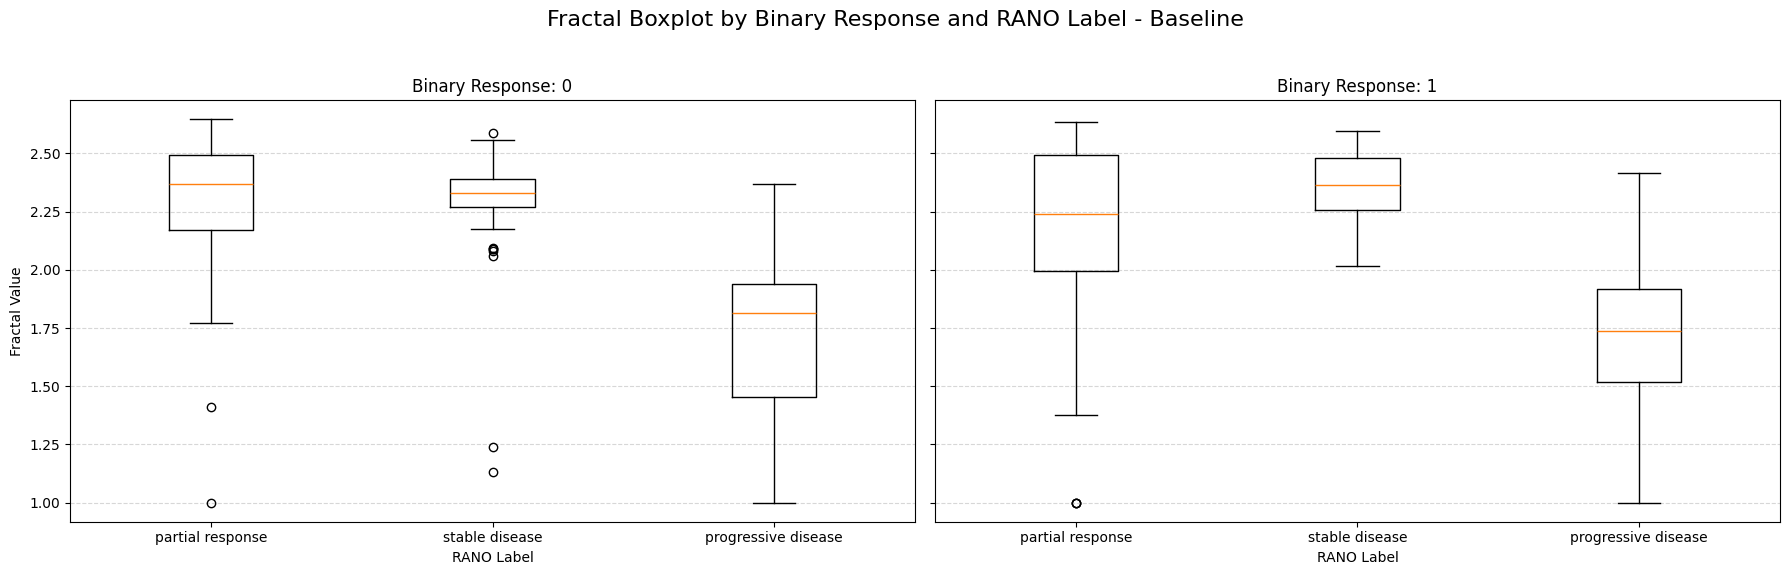

/tmp/ipykernel_834807/2303621389.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[resp_idx].boxplot(
/tmp/ipykernel_834807/2303621389.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[resp_idx].boxplot(


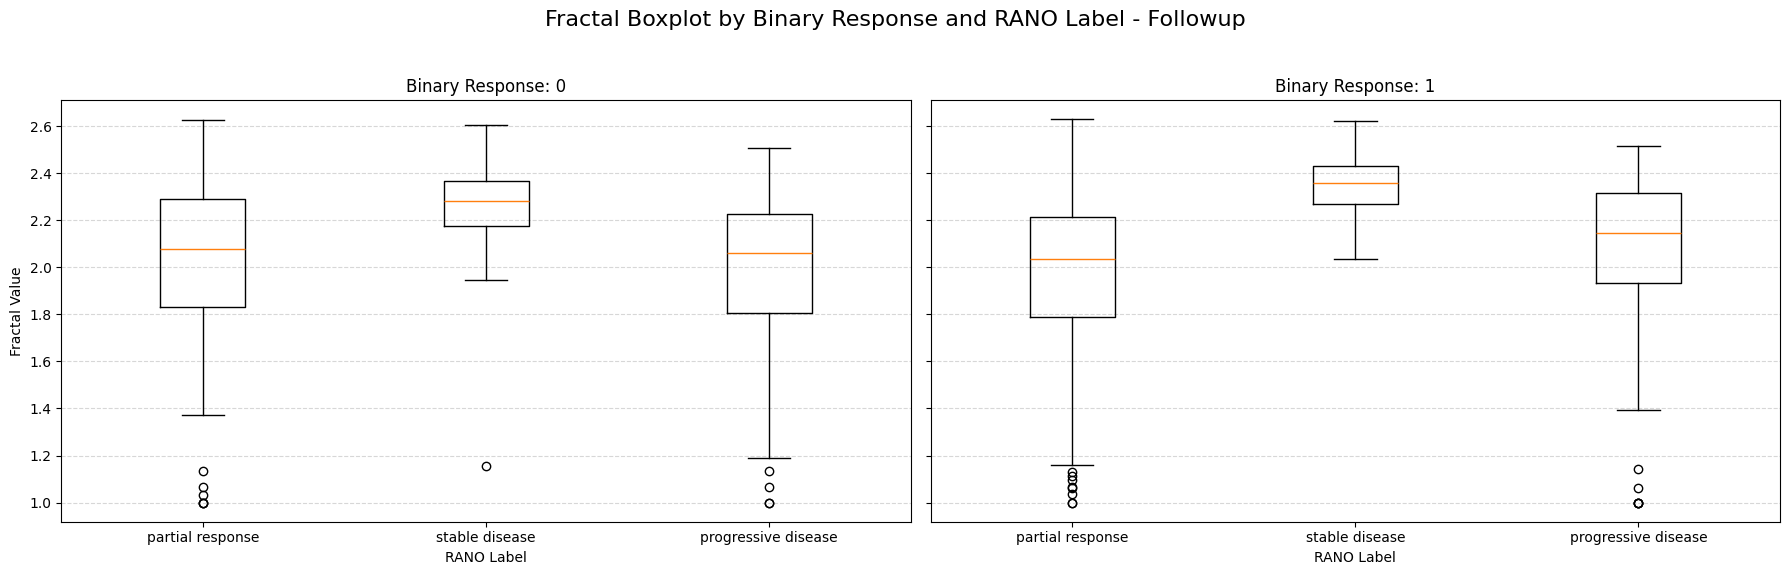

In [40]:
# Boxplot: For each binary_response (0,1), show fractal values for each mapped RANO label (1,2,3) as 3 boxplots in a single figure
import matplotlib.pyplot as plt

# Use the RANO_dic to rename the *label* columns for clarity in plotting
if "binary_response" not in morph_df.columns:
    print("Warning: 'binary_response' column not found in morph_df. Please ensure it exists and is binary (0/1).")

for timepoint in ["baseline", "followup"]:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    for resp_idx, resp in enumerate([0, 1]):
        data_to_plot = []
        box_labels = []
        for label in [1, 2, 3]:
            col = f'fractal_{timepoint}_label_{label}'
            values = morph_df[morph_df['binary_response'] == resp][col].dropna()
            data_to_plot.append(values)
            label_name = RANO_dic.get(label, f"Label {label}")
            box_labels.append(label_name)
        axes[resp_idx].boxplot(
            data_to_plot,
            labels=box_labels
        )
        axes[resp_idx].set_title(f'Binary Response: {resp}')
        axes[resp_idx].set_xlabel('RANO Label')
        axes[resp_idx].grid(axis='y', linestyle='--', alpha=0.5)
    axes[0].set_ylabel('Fractal Value')
    fig.suptitle(f'Fractal Boxplot by Binary Response and RANO Label - {timepoint.capitalize()}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [37]:
RANO_dic = {0: 'complete response', 
1: 'partial response', 
2: 'stable disease',
3: 'progressive disease'
}
